In [1]:
import pandas as pd
import numpy as np
import requests, zipfile, io
import os
import matplotlib.pyplot as plt
import seaborn as sns
# get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
if not os.path.exists("diabetic_data.csv"):
    f_zip = "https://archive.ics.uci.edu/static/public/296/diabetes+130-us+hospitals+for+years+1999-2008.zip"
    r = requests.get(f_zip, stream=True)
    Vertebral_zip = zipfile.ZipFile(io.BytesIO(r.content))
    Vertebral_zip.extractall()

In [3]:
import pandas as pd

df = pd.read_csv("diabetic_data.csv")
print(df.describe())

       encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.00000

In [4]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
df = df.fillna("None")
df = df.replace('?', np.nan)
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
drugNames = ["metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide", "examide", "citoglipton", "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone"]
unusedColumns = ["encounter_id", "patient_nbr", "weight", "payer_code", "medical_specialty", "diag_1", "diag_2", "diag_3"]
unused_reasons = ["Not relivent", "Not relivent", "Too many Nan values", "Not relivent", "Too many Nan values", "Too Many Possible values", "Too Many Possible values", "Too Many Possible values"]

non_ordinalColumns = ["race", "gender", "admission_type_id", "discharge_disposition_id", "admission_source_id"]
ordinal_columns = ["age", "max_glu_serum", "A1Cresult", "insulin", "change", "diabetesMed", "readmitted"] + drugNames
ordinal_base_labels = ["No", "Down", "Steady", "Up"]
ordinal_column_labels = [["[0-10)", "[10-20)", "[20-30)", "[30-40)", "[40-50)", "[50-60)", "[60-70)", "[70-80)", "[80-90)", "[90-100)"], ["None", "Norm", ">200", ">300"], ["None", "Norm", ">7", ">8"], ordinal_base_labels, ["No", "Ch"], ["No", "Yes"], ["NO", ">30", "<30"]] + ([ordinal_base_labels]*len(drugNames))
ordinal_column_labels_dict = {y:{z:a for (a,z) in enumerate(ordinal_column_labels[x])} for x,y in enumerate(ordinal_columns)}
ordinal_column_labels_dict["readmitted"]["<30"] = 1
ordinal_column_labels_dict["readmitted"][">30"] = 0
ordinal_column_labels_dict

{'age': {'[0-10)': 0,
  '[10-20)': 1,
  '[20-30)': 2,
  '[30-40)': 3,
  '[40-50)': 4,
  '[50-60)': 5,
  '[60-70)': 6,
  '[70-80)': 7,
  '[80-90)': 8,
  '[90-100)': 9},
 'max_glu_serum': {'None': 0, 'Norm': 1, '>200': 2, '>300': 3},
 'A1Cresult': {'None': 0, 'Norm': 1, '>7': 2, '>8': 3},
 'insulin': {'No': 0, 'Down': 1, 'Steady': 2, 'Up': 3},
 'change': {'No': 0, 'Ch': 1},
 'diabetesMed': {'No': 0, 'Yes': 1},
 'readmitted': {'NO': 0, '>30': 0, '<30': 1},
 'metformin': {'No': 0, 'Down': 1, 'Steady': 2, 'Up': 3},
 'repaglinide': {'No': 0, 'Down': 1, 'Steady': 2, 'Up': 3},
 'nateglinide': {'No': 0, 'Down': 1, 'Steady': 2, 'Up': 3},
 'chlorpropamide': {'No': 0, 'Down': 1, 'Steady': 2, 'Up': 3},
 'glimepiride': {'No': 0, 'Down': 1, 'Steady': 2, 'Up': 3},
 'acetohexamide': {'No': 0, 'Down': 1, 'Steady': 2, 'Up': 3},
 'glipizide': {'No': 0, 'Down': 1, 'Steady': 2, 'Up': 3},
 'glyburide': {'No': 0, 'Down': 1, 'Steady': 2, 'Up': 3},
 'tolbutamide': {'No': 0, 'Down': 1, 'Steady': 2, 'Up': 3},
 'p

In [7]:
df = df.drop(unusedColumns, axis=1)
print(df.head())
df.describe()

              race  gender      age  admission_type_id  \
0        Caucasian  Female   [0-10)                  6   
1        Caucasian  Female  [10-20)                  1   
2  AfricanAmerican  Female  [20-30)                  1   
3        Caucasian    Male  [30-40)                  1   
4        Caucasian    Male  [40-50)                  1   

   discharge_disposition_id  admission_source_id  time_in_hospital  \
0                        25                    1                 1   
1                         1                    7                 3   
2                         1                    7                 2   
3                         1                    7                 2   
4                         1                    7                 1   

   num_lab_procedures  num_procedures  num_medications  ...  citoglipton  \
0                  41               0                1  ...           No   
1                  59               0               18  ...           No   
2 

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [8]:
# Create non-ordinal data binary columns
df = pd.get_dummies(df,columns=non_ordinalColumns)
print(df.describe())
df.head()

       time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
count     101766.000000       101766.000000   101766.000000    101766.000000   
mean           4.395987           43.095641        1.339730        16.021844   
std            2.985108           19.674362        1.705807         8.127566   
min            1.000000            1.000000        0.000000         1.000000   
25%            2.000000           31.000000        0.000000        10.000000   
50%            4.000000           44.000000        1.000000        15.000000   
75%            6.000000           57.000000        2.000000        20.000000   
max           14.000000          132.000000        6.000000        81.000000   

       number_outpatient  number_emergency  number_inpatient  \
count      101766.000000     101766.000000     101766.000000   
mean            0.369357          0.197836          0.635566   
std             1.267265          0.930472          1.262863   
min             0.00000

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,...,admission_source_id_8,admission_source_id_9,admission_source_id_10,admission_source_id_11,admission_source_id_13,admission_source_id_14,admission_source_id_17,admission_source_id_20,admission_source_id_22,admission_source_id_25
0,[0-10),1,41,0,1,0,0,0,1,None,...,0,0,0,0,0,0,0,0,0,0
1,[10-20),3,59,0,18,0,0,0,9,None,...,0,0,0,0,0,0,0,0,0,0
2,[20-30),2,11,5,13,2,0,1,6,None,...,0,0,0,0,0,0,0,0,0,0
3,[30-40),2,44,1,16,0,0,0,7,None,...,0,0,0,0,0,0,0,0,0,0
4,[40-50),1,51,0,8,0,0,0,5,None,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Map ordinal columns to integers
for x in ordinal_columns:
    df[x] = df[x].map(ordinal_column_labels_dict[x])
df.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,...,admission_source_id_8,admission_source_id_9,admission_source_id_10,admission_source_id_11,admission_source_id_13,admission_source_id_14,admission_source_id_17,admission_source_id_20,admission_source_id_22,admission_source_id_25
0,0,1,41,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3,59,0,18,0,0,0,9,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,11,5,13,2,0,1,6,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2,44,1,16,0,0,0,7,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,51,0,8,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Move the target column to the first position
cols = df.columns.to_list()
cols.remove("readmitted")
cols = ["readmitted"] + cols
df = df[cols]
df.head()

,readmitted,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,admission_source_id_8,admission_source_id_9,admission_source_id_10,admission_source_id_11,admission_source_id_13,admission_source_id_14,admission_source_id_17,admission_source_id_20,admission_source_id_22,admission_source_id_25
0,0,0,1,41,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,3,59,0,18,0,0,0,9,...,0,0,0,0,0,0,0,0,0,0
2,0,2,2,11,5,13,2,0,1,6,...,0,0,0,0,0,0,0,0,0,0
3,0,3,2,44,1,16,0,0,0,7,...,0,0,0,0,0,0,0,0,0,0
4,0,4,1,51,0,8,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_count = pd.DataFrame()
for drg in drugNames + ["insulin"]:
    df_count = pd.concat([df_count, df[drg].value_counts()], axis=1)
df_count.columns = drugNames + ["insulin"]
df_count.index = [ordinal_base_labels[x] for x in df_count.index]
df_count

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,...,troglitazone,tolazamide,examide,citoglipton,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,insulin
No,81778,100227,101063,101680,96575,101765.0,89080,91116,101743.0,94438,...,101763.0,101727.0,101766.0,101766.0,101060,101753.0,101765.0,101764.0,101765.0,47383
Steady,18346,1384,668,79,4670,1.0,11356,9274,23.0,6976,...,3.0,38.0,NaN,NaN,692,13.0,1.0,2.0,1.0,30849
Up,1067,110,24,6,327,NaN,770,812,NaN,234,...,NaN,1.0,NaN,NaN,8,NaN,NaN,NaN,NaN,11316
Down,575,45,11,1,194,NaN,560,564,NaN,118,...,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,12218


In [12]:
# Create sum totals of columns without NaN
df_count.fillna(0)
df_count_sums = df_count.loc[["Steady", "Up", "Down"]].sum(axis=0)
df_count_sums

metformin                   19988.0
repaglinide                  1539.0
nateglinide                   703.0
chlorpropamide                 86.0
glimepiride                  5191.0
acetohexamide                   1.0
glipizide                   12686.0
glyburide                   10650.0
tolbutamide                    23.0
pioglitazone                 7328.0
rosiglitazone                6365.0
acarbose                      308.0
miglitol                       38.0
troglitazone                    3.0
tolazamide                     39.0
examide                         0.0
citoglipton                     0.0
glyburide-metformin           706.0
glipizide-metformin            13.0
glimepiride-pioglitazone        1.0
metformin-rosiglitazone         2.0
metformin-pioglitazone          1.0
insulin                     54383.0
dtype: float64

## Undersampling

In [13]:
# https://www.geeksforgeeks.org/pandas-how-to-shuffle-a-dataframe-rows/
df = df.sample(frac = 1)
df = pd.concat([df[df["readmitted"]==0].head(5000),df[df["readmitted"]==1].head(5000)])
df = df.sample(frac = 1)
df

,readmitted,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,admission_source_id_8,admission_source_id_9,admission_source_id_10,admission_source_id_11,admission_source_id_13,admission_source_id_14,admission_source_id_17,admission_source_id_20,admission_source_id_22,admission_source_id_25
76072,0,8,1,36,0,6,0,0,2,9,...,0,0,0,0,0,0,0,0,0,0
41820,1,8,8,9,5,18,0,0,0,9,...,0,0,0,0,0,0,0,0,0,0
51089,1,5,5,94,1,17,0,1,4,9,...,0,0,0,0,0,0,0,0,0,0
92856,0,8,3,49,1,4,0,2,1,8,...,0,0,0,0,0,0,0,0,0,0
71835,1,2,3,10,2,7,0,0,3,9,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93390,0,5,1,18,0,2,0,1,0,7,...,0,0,0,0,0,0,0,0,0,0
26169,1,7,1,55,0,7,2,0,2,5,...,0,0,0,0,0,0,0,0,0,0
29475,0,7,4,67,0,14,0,0,0,9,...,0,0,0,0,0,0,0,0,0,0
79874,1,6,6,63,0,16,2,0,0,9,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Make sure columns contain more than a small number of non-default items
df_count = pd.DataFrame()
for drg in df.columns:
    df_count = pd.concat([df_count, df[drg].value_counts()], axis=1)
df_count.columns = df.columns
df_count
df_count.fillna(0)
for column in df_count.columns:
    df_count[column][df_count[column].idxmax()] = 0
df_count_sums = df_count.sum(axis=0)
print(df_count_sums.sort_values())
columns_without_variation = df_count_sums.keys()[df_count_sums < 10]
columns_without_variation

admission_source_id_25         0.0
glimepiride-pioglitazone       0.0
citoglipton                    0.0
examide                        0.0
troglitazone                   0.0
                             ...  
insulin                     5553.0
age                         7340.0
time_in_hospital            8263.0
num_medications             9391.0
num_lab_procedures          9716.0
Length: 96, dtype: float64


Index(['chlorpropamide', 'acetohexamide', 'tolbutamide', 'miglitol',
       'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone',
       'gender_Unknown/Invalid', 'admission_type_id_4', 'admission_type_id_7',
       'discharge_disposition_id_8', 'discharge_disposition_id_9',
       'discharge_disposition_id_10', 'discharge_disposition_id_12',
       'discharge_disposition_id_16', 'discharge_disposition_id_17',
       'discharge_disposition_id_19', 'discharge_disposition_id_20',
       'discharge_disposition_id_24', 'discharge_disposition_id_27',
       'admission_source_id_8', 'admission_source_id_10',
       'admission_source_id_11', 'admission_source_id_13',
       'admission_source_id_14', 'admission_source_id_22',
       'admission_source_id_25'],
      dtype='object')

In [15]:
#Drop useless columns
df_cleaned = df.drop(columns_without_variation, axis=1)
df_cleaned = df_cleaned.astype(int)
df_cleaned


,readmitted,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,admission_source_id_1,admission_source_id_2,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_9,admission_source_id_17,admission_source_id_20
76072,0,8,1,36,0,6,0,0,2,9,...,0,0,0,0,0,0,1,0,0,0
41820,1,8,8,9,5,18,0,0,0,9,...,1,0,0,0,0,0,0,0,0,0
51089,1,5,5,94,1,17,0,1,4,9,...,0,0,0,0,0,0,1,0,0,0
92856,0,8,3,49,1,4,0,2,1,8,...,0,0,0,0,0,0,1,0,0,0
71835,1,2,3,10,2,7,0,0,3,9,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93390,0,5,1,18,0,2,0,1,0,7,...,0,0,0,0,0,0,1,0,0,0
26169,1,7,1,55,0,7,2,0,2,5,...,0,0,0,0,0,0,1,0,0,0
29475,0,7,4,67,0,14,0,0,0,9,...,0,0,0,0,1,0,0,0,0,0
79874,1,6,6,63,0,16,2,0,0,9,...,0,0,0,0,0,0,1,0,0,0


In [16]:
# Display summary statistics for numerical columns
print(df_cleaned.describe())

# Count the number of occurrences for a categorical variable (e.g., 'race' or 'num_lab_procedures')
print(df_cleaned['num_lab_procedures'].value_counts())

         readmitted           age  time_in_hospital  num_lab_procedures  \
count  10000.000000  10000.000000      10000.000000        10000.000000   
mean       0.500000      6.142900          4.546300           43.594400   
std        0.500025      1.567139          3.019432           19.436797   
min        0.000000      0.000000          1.000000            1.000000   
25%        0.000000      5.000000          2.000000           32.000000   
50%        0.500000      6.000000          4.000000           44.000000   
75%        1.000000      7.000000          6.000000           57.000000   
max        1.000000      9.000000         14.000000          129.000000   

       num_procedures  num_medications  number_outpatient  number_emergency  \
count    10000.000000     10000.000000       10000.000000      10000.000000   
mean         1.323700        16.444500           0.414900          0.270700   
std          1.682023         8.081253           1.272289          1.027486   
min     

In [17]:
def compare_results(targets:list, predictions:list):
    # Print a pie chart showing how many of the models failed.
    values = np.array(predictions) != targets
    # print(values)
    totals = values.sum(axis=0).astype(int)
    totals.sort()

    totals_bin = np.bincount(totals)
    keys = [f"{x} models failed" for x in range(len(totals_bin))]

    plt.figure(figsize=(10, 6))
    plt.pie(totals_bin, labels=keys, explode=[0.1*x for x in range(len(totals_bin))], autopct='%.0f%%') 
    plt.show()

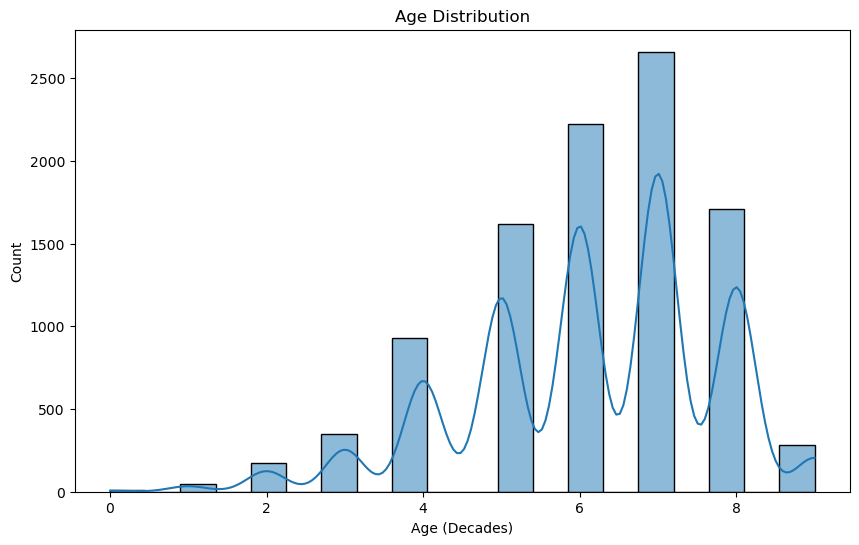

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age (Decades)')
plt.ylabel('Count')
plt.show()

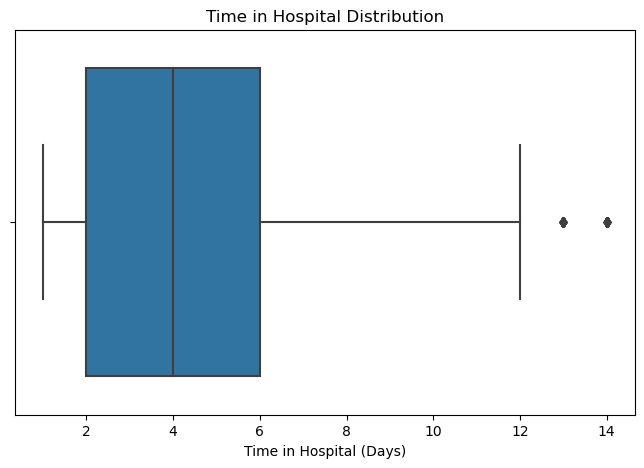

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='time_in_hospital', data=df)
plt.title('Time in Hospital Distribution')
plt.xlabel('Time in Hospital (Days)')
plt.show()

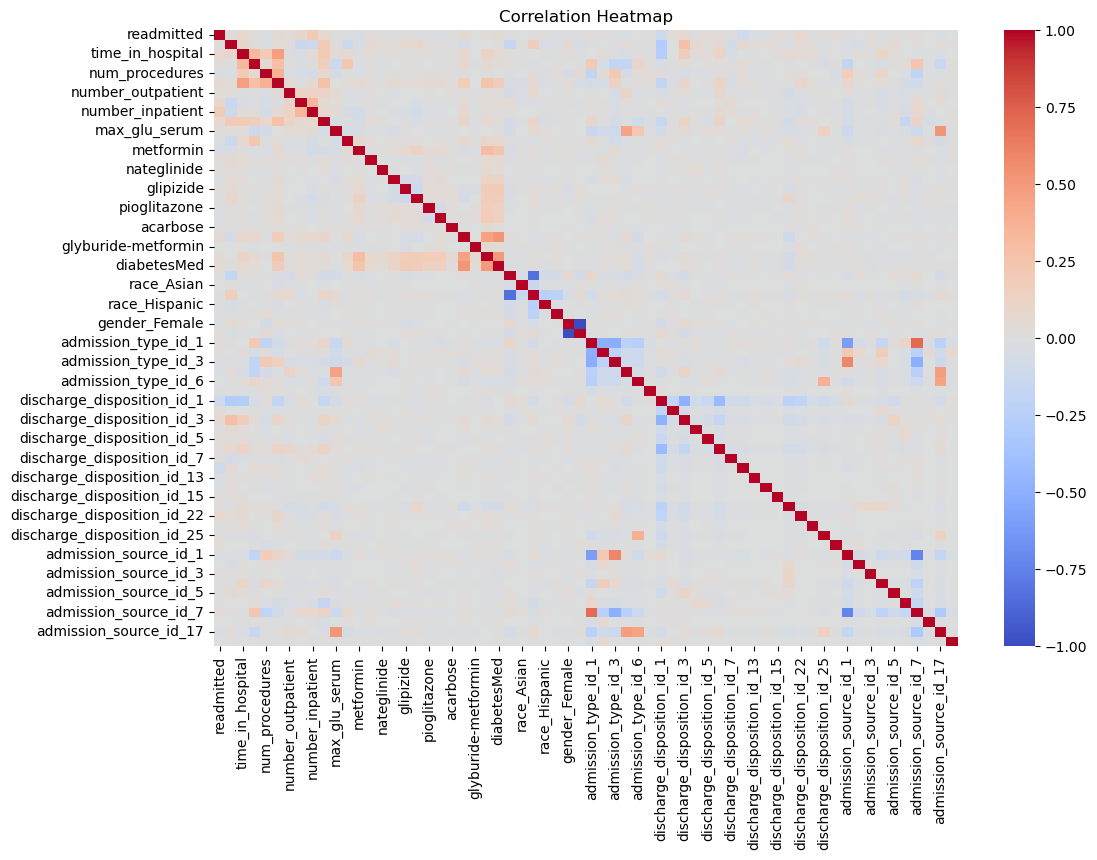

In [20]:
numeric_columns = df_cleaned.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

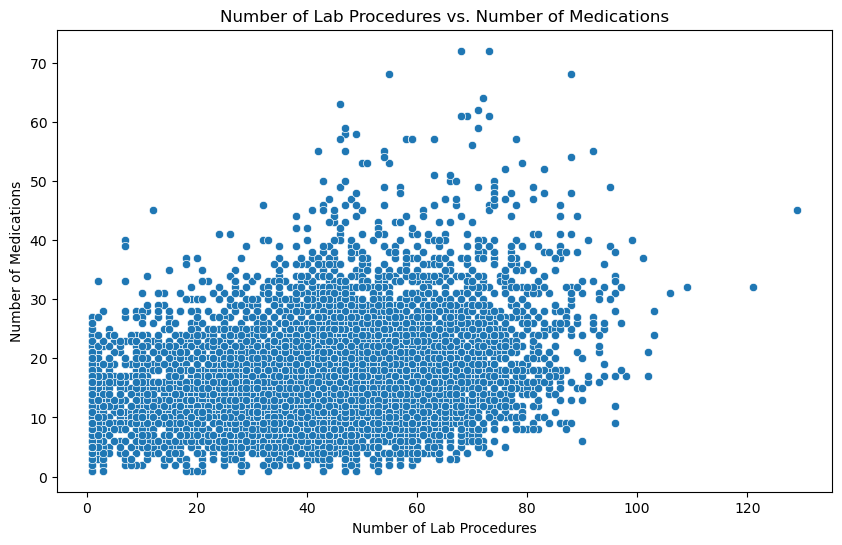

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_lab_procedures', y='num_medications', data=df_cleaned)
plt.title('Number of Lab Procedures vs. Number of Medications')
plt.xlabel('Number of Lab Procedures')
plt.ylabel('Number of Medications')
plt.show()

In [22]:
print(df_cleaned.isnull().sum())

# Check for missing values in a specific column (e.g., 'weight')
print(df_cleaned['max_glu_serum'].isnull().sum())

readmitted                0
age                       0
time_in_hospital          0
num_lab_procedures        0
num_procedures            0
                         ..
admission_source_id_6     0
admission_source_id_7     0
admission_source_id_9     0
admission_source_id_17    0
admission_source_id_20    0
Length: 64, dtype: int64
0


### Readmitted as the target variable

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [24]:
# Handle categorical variables using label encoding
label_encoder = LabelEncoder()
for column in df_cleaned.select_dtypes(include='object').columns:
    df_cleaned[column] = label_encoder.fit_transform(df_cleaned[column])

# Handle missing values (as an example, replacing with mean for numerical columns)
df_cleaned.fillna(df_cleaned.mean(), inplace=True)

In [25]:
# Split the dataset into features (X) and target variable (y)
X = df_cleaned.drop('readmitted', axis=1)
y = df_cleaned['readmitted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test_results = {"True": y_test}

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
selector = SelectKBest(score_func=f_classif, k=10)  # k is the number of top features to select
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Ignore for now
X_train_selected = X_train
X_test_selected = X_test

In [28]:
# Initialize the XGBoost classifier
model = XGBClassifier()

# Train the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [29]:
y_test_results["XGB_Basic"] = model.predict(X_test_selected)

accuracy = accuracy_score(y_test_results["True"], y_test_results["XGB_Basic"])
conf_matrix = confusion_matrix(y_test_results["True"], y_test_results["XGB_Basic"])
classification_rep = classification_report(y_test_results["True"], y_test_results["XGB_Basic"])
precision = precision_score(y_test_results["True"], y_test_results["XGB_Basic"])
recall = recall_score(y_test_results["True"], y_test_results["XGB_Basic"])
f1 = f1_score(y_test_results["True"], y_test_results["XGB_Basic"])

print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.63
Confusion Matrix:
[[632 360]
 [389 619]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.64      0.63       992
           1       0.63      0.61      0.62      1008

    accuracy                           0.63      2000
   macro avg       0.63      0.63      0.63      2000
weighted avg       0.63      0.63      0.63      2000

Precision: 0.63
Recall: 0.61
F1 Score: 0.62


In [30]:
model_xgboost = XGBClassifier()

In [31]:
# XGBoost Gridsearch
param_grid_xg = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [1, 3, 5]
}


model_xgboost = XGBClassifier()
grid_search_xgboost = GridSearchCV(estimator=model_xgboost, param_grid=param_grid_xg, scoring='accuracy', cv=3, verbose=2)

grid_search_xgboost.fit(X_train_selected, y_train)

y_test_results

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, min_chil

[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=50; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200; total time=   1.0s
[CV] END learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=50; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=100; total time=   0.3s
[CV] END learning_rate=

{'True': 29018    0
 17975    1
 10677    0
 13576    0
 79154    0
         ..
 34199    0
 40491    1
 22161    1
 60344    1
 87002    1
 Name: readmitted, Length: 2000, dtype: int32,
 'XGB_Basic': array([1, 0, 0, ..., 1, 1, 0])}

In [32]:
from sklearn.model_selection import GridSearchCV
grid_search_xgboost = GridSearchCV(estimator=model_xgboost, param_grid=param_grid_xg, scoring='accuracy', cv=3, verbose=2)

In [33]:
grid_search_xgboost.fit(X_train, y_train)

y_test_results

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, min_chil

[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=50; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=50; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=50; total time=   0.2s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=50; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=100; total time=   0.3s
[CV] END learning_rate=

{'True': 29018    0
 17975    1
 10677    0
 13576    0
 79154    0
         ..
 34199    0
 40491    1
 22161    1
 60344    1
 87002    1
 Name: readmitted, Length: 2000, dtype: int32,
 'XGB_Basic': array([1, 0, 0, ..., 1, 1, 0])}

### Logistic Regression

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_LogReg = LogisticRegression()
model_LogReg.fit(X_train_selected, y_train)

y_test_results["Logistic Regression"] = model_LogReg.predict(X_test_selected)

accuracy = model_LogReg.score(X_test_selected, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 63.30%


C:\Users\lukad\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_selected, y_train)
rf_predictions = rf_model.predict(X_test_selected)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy: {:.2f}%".format(rf_accuracy * 100))

Random Forest Accuracy: 61.75%


In [36]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_selected, y_train)
gb_predictions = gb_model.predict(X_test_selected)
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Accuracy: {:.2f}%".format(gb_accuracy * 100))

Gradient Boosting Accuracy: 63.80%


### Hyperparameter tuning for Gradient Boosting

In [37]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_selected, y_train)
y_test_results["Gradient Boost"] = gb_model.predict(X_test_selected)
gb_accuracy = accuracy_score(y_test_results["True"], y_test_results["Gradient Boost"])
print("Gradient Boosting Accuracy: {:.2f}%".format(gb_accuracy * 100))

Gradient Boosting Accuracy: 63.80%


### Deploying Neural Network Models

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [41]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/10


250/250 [==============================] - 4s 7ms/step - loss: 0.6950 - accuracy: 0.5555 - val_loss: 0.6539 - val_accuracy: 0.6135
Epoch 2/10
250/250 [==============================] - 1s 5ms/step - loss: 0.6614 - accuracy: 0.6030 - val_loss: 0.6475 - val_accuracy: 0.6300
Epoch 3/10
250/250 [==============================] - 1s 5ms/step - loss: 0.6548 - accuracy: 0.6049 - val_loss: 0.6449 - val_accuracy: 0.6340
Epoch 4/10
250/250 [==============================] - 1s 5ms/step - loss: 0.6505 - accuracy: 0.6075 - val_loss: 0.6437 - val_accuracy: 0.6285
Epoch 5/10
250/250 [==============================] - 1s 5ms/step - loss: 0.6448 - accuracy: 0.6224 - val_loss: 0.6449 - val_accuracy: 0.6320
Epoch 6/10
250/250 [==============================] - 1s 5ms/step - loss: 0.6407 - accuracy: 0.6259 - val_loss: 0.6429 - val_accuracy: 0.6275
Epoch 7/10
250/250 [==============================] - 1s 5ms/step - loss: 0.6373 - accuracy: 0.6265 - val_loss: 0.6424 - val_accuracy: 0.6330
Epo

In [42]:
y_test_results["ANN"] = model.predict(X_test_scaled).flatten()
y_test_results["ANN"] = np.greater(y_test_results["ANN"], 0.5).astype(int)
_, accuracy = model.evaluate(X_test_scaled, y_test_results["True"])
print("Neural Network Accuracy: {:.2f}%".format(accuracy * 100))

63/63 [==============================] - 0s 3ms/step - loss: 0.6450 - accuracy: 0.6245
Neural Network Accuracy: 62.45%


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_predictions = dt_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy: {:.2f}%".format(dt_accuracy * 100))

Decision Tree Accuracy: 55.90%


In [44]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_test_results["Decision Tree"] = dt_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test_results["True"], y_test_results["Decision Tree"])
print("Decision Tree Accuracy: {:.2f}%".format(dt_accuracy * 100))

Decision Tree Accuracy: 55.90%


In [45]:
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can experiment with different values of 'n_neighbors'
knn_model.fit(X_train_scaled, y_train)
y_test_results["K Near"] = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test_results["True"], y_test_results["K Near"])
print("K-Nearest Neighbors Accuracy: {:.2f}%".format(knn_accuracy * 100))

K-Nearest Neighbors Accuracy: 55.55%


In [46]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
}

In [47]:
# Hyperparameter tuning for Decision Tree
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    # Add other hyperparameters to be tuned
}

dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5, verbose=2)
dt_grid_search.fit(X_train_scaled, y_train)

# Print best parameters and best score
print("Best Decision Tree parameters:", dt_grid_search.best_params_)
print("Best Decision Tree Accuracy after tuning:", dt_grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .....................criterion=gini, max_depth=None; total time=   0.2s
[CV] END .....................criterion=gini, max_depth=None; total time=   0.1s
[CV] END .....................criterion=gini, max_depth=None; total time=   0.1s
[CV] END .....................criterion=gini, max_depth=None; total time=   0.1s
[CV] END .....................criterion=gini, max_depth=None; total time=   0.2s
[CV] END .......................criterion=gini, max_depth=10; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=10; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=10; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=10; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=10; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=20; total time=   0.1s
[CV] END .......................criterion=gini, m

In [48]:
df.columns

Index(['readmitted', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed',
       'race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic',
       'race_Other', 'gender_Female', 'gender_Male', 'gender_Unknown/Invalid',
       'admission_type_id_1', 'admission_type_id_2', 'admission_type_id_3',
       'admission_type_id_4', 'admission_type_id_5', 'admission_type_id_6'

## Before we begin with SVC, we are gonna try to extract the most reasonable feature 

### 1, Recursive Feature Elimination (RFE) with Cross-Validation:


In [49]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [50]:
model = RandomForestClassifier()  # Replace with chosen model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rfe = RFE(model, n_features_to_select=10)  


X_train_selected = rfe.fit_transform(X_train_scaled, y_train)

### 2. SelectKBest with ANOVA (F-Test):
SelectKBest is a univariate feature selection method that selects the top k features based on statistical tests. In this example, I'm using the F-test (ANOVA) for classification problems.

In [51]:
from sklearn.feature_selection import SelectKBest, f_classif

In [52]:
k_best = SelectKBest(score_func=f_classif, k=20)  

X_train_selected = k_best.fit_transform(X_train_scaled, y_train)

Model-Based Feature Importance:

Training a model that provides feature importance scores. Using Random Forest that has a feature_importances_ attribute.

In [53]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Getting feature importances
feature_importances = model.feature_importances_

print("Feature Importances:", feature_importances)


Feature Importances: [0.06662951 0.07643585 0.11631991 0.05365158 0.10294537 0.02837415
 0.02183186 0.05809133 0.05230076 0.00757256 0.02242279 0.01906962
 0.00446453 0.00180083 0.00844108 0.01696507 0.01518477 0.01050127
 0.01026306 0.00076344 0.03655698 0.00155979 0.01751974 0.01279143
 0.01383161 0.00134849 0.01588498 0.00361555 0.00340535 0.01643333
 0.01699638 0.01391836 0.01309375 0.0114548  0.00520015 0.00556081
 0.00058615 0.01488933 0.00431502 0.01068354 0.0021538  0.00352294
 0.00984436 0.00145826 0.00803326 0.00129981 0.00116936 0.00051165
 0.00525468 0.00614122 0.00098759 0.00139252 0.00118033 0.01195061
 0.00222895 0.00046245 0.00454479 0.00183522 0.00321934 0.01302148
 0.00022344 0.00538907 0.00049999]


Final Evaluation

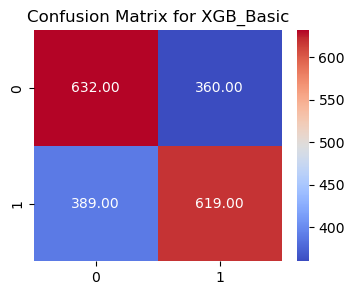

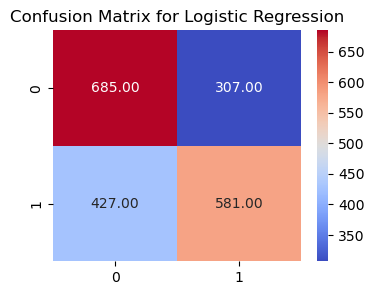

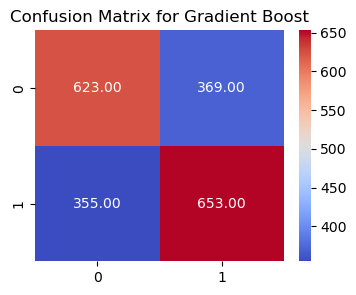

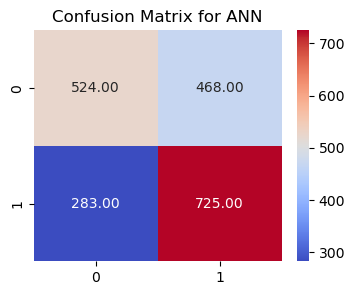

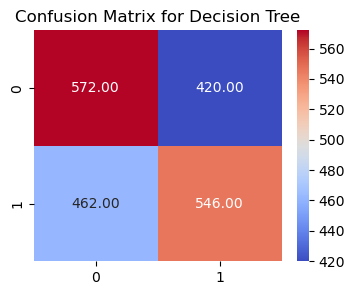

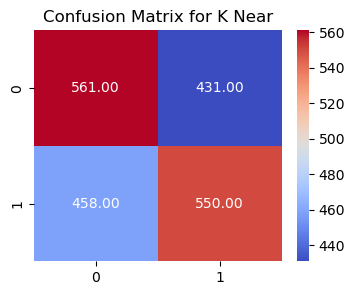

XGB_Basic F1 score: 0.6230498238550579
Logistic Regression F1 score: 0.6128691983122363
Gradient Boost F1 score: 0.6433497536945813
ANN F1 score: 0.6587914584279873
Decision Tree F1 score: 0.5531914893617021
K Near F1 score: 0.5530417295123177


In [54]:
for model in y_test_results.keys():
    if not model == "True":
#         print(y_test_results[model])
        plt.figure(figsize=(4, 3))
        sns.heatmap(confusion_matrix(y_test_results["True"],y_test_results[model]), annot=True, cmap='coolwarm', fmt=".2f")
        plt.title(f'Confusion Matrix for {model}')
        plt.show()
#         print(f"{model} F1 score: {f1_score(y_test_results['True'],y_test_results[model])}")

for model in y_test_results.keys():
    if not model == "True":
        print(f"{model} F1 score: {f1_score(y_test_results['True'],y_test_results[model])}")

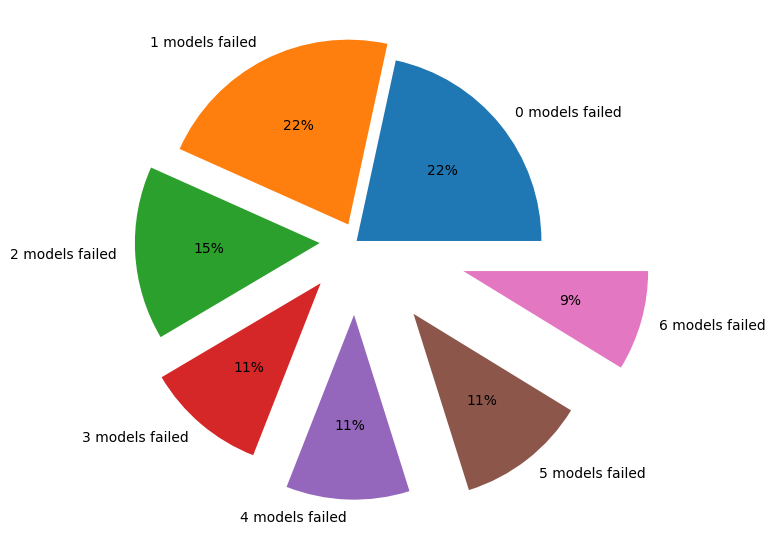

In [55]:

compare_results(list(y_test_results["True"]), [y_test_results[x] for x in y_test_results.keys() if x not in ["True"]])